In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
!pip install tensorflow
from tensorflow.keras import layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import io
import requests
url = 'https://raw.githubusercontent.com/jelink27/Data_analytics_project/main/kc_house_price_predicting/kc_house_data.csv'
#這邊要指向github的raw檔案

s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
#顯示資料 將顯示列數設定為25，不然會有資料無法顯示
pd.options.display.max_columns = 25

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#檢查資料型別

data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
#3 資料前處理

#因為資料集裡的data資料是字串(string)格式，而模型的輸入只接受數值格式，所以可以透過下列程式碼將其轉為數值，並分為年、月、日等三種資料

#將日期拆分為年、月、日並轉成數值

data['year'] = pd.to_numeric(data['date'].str.slice(0, 4))
data['month'] = pd.to_numeric(data['date'].str.slice(4, 6))
data['day'] = pd.to_numeric(data['date'].str.slice(6, 8))

#刪除沒有用的資料，inplace則是將更新後的資料存回原本的地方
data.drop(['id'],axis='columns',inplace=True)
data.drop(['date'],axis='columns',inplace=True)
data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [7]:
#分割資料集

#將資料集切割成三個部分：訓練資料(Training data)、驗證資料(Validation data)和測試資料(Testing data)

data_num = data.shape[0] #取得與資料筆數相同的數字，主要目的用於打散資料
indexes = np.random.permutation(data_num)
print(indexes) #會得到亂數排序的所有數字

#並將亂數索引值分為Train、Validation和test，這裡劃分為6:2:2
train_indexes = indexes[:int(data_num*0.6)] #訓練資料為 前60%的隨機數字
val_indexes = indexes[int(data_num*0.6):int(data_num*0.8)]
test_indexes = indexes[int(data_num*0.8):]

#透過索引值從data取得訓練資料、驗證資料和測試資料

train_data = data.loc[train_indexes]
val_data = data.loc[val_indexes]
test_data = data.loc[test_indexes]

[ 7358  3213  1455 ...  3010 13674 17939]


In [8]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12967 entries, 7358 to 11498
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          12967 non-null  float64
 1   bedrooms       12967 non-null  int64  
 2   bathrooms      12967 non-null  float64
 3   sqft_living    12967 non-null  int64  
 4   sqft_lot       12967 non-null  int64  
 5   floors         12967 non-null  float64
 6   waterfront     12967 non-null  int64  
 7   view           12967 non-null  int64  
 8   condition      12967 non-null  int64  
 9   grade          12967 non-null  int64  
 10  sqft_above     12967 non-null  int64  
 11  sqft_basement  12967 non-null  int64  
 12  yr_built       12967 non-null  int64  
 13  yr_renovated   12967 non-null  int64  
 14  zipcode        12967 non-null  int64  
 15  lat            12967 non-null  float64
 16  long           12967 non-null  float64
 17  sqft_living15  12967 non-null  int64  
 18  sqf

In [9]:
#標準化 (Normalization)
#房屋臥室大小大約是1~5間 但居住坪數則為1500~2500m**2之間，由於資料集差異太大，可能導致神經網路較重視數值較大的資料而忽略較小的資料
#為了解決此問題，通常把輸入資料縮放至0~1之間 或-1~1之間 這過程稱為資料標準化

train_validation_data = pd.concat([train_data, val_data]) #這邊把訓練跟驗證資料concat起來，為了要做標準化
mean = train_validation_data.mean()
std = train_validation_data.std()

# print(mean) 因為這邊都是int跟float了 所以可以直接計算mean跟std
# print(std)
#標準化公式為 x-平均值/標準差

train_data = (train_data - mean) / std
val_data = (val_data - mean) /std #對矩陣做四則運算是ok的

print(train_data)

          price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
7358   0.670272  0.661655   1.793789     1.348480 -0.153669  0.941592   
3213  -0.092444 -1.464545  -0.474664    -0.839314 -0.277748 -0.914433   
1455  -0.426302 -0.401445   0.173466    -0.305971 -0.260747  0.941592   
18739 -0.581016  0.661655   0.173466     0.053219 -0.161350 -0.914433   
1047  -0.108729 -1.464545  -0.474664    -0.044742  2.474896 -0.914433   
...         ...       ...        ...          ...       ...       ...   
18367  1.631131  0.661655  -0.474664     1.087251 -0.211036 -0.914433   
21339 -0.296016 -1.464545   0.497530    -0.610738 -0.333126  0.941592   
10194 -0.184730  0.661655   0.497530     0.270910 -0.125831  0.941592   
17236 -0.868731  0.661655  -1.446858    -0.774006 -0.239893  0.013579   
11498  1.158845  1.724755   3.090048     1.881823 -0.173280  0.941592   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
7358    -0.085677 -0.306429  -0.628772  1.14

In [10]:
#建立numpy array格式的訓練資料

x_train = np.array(train_data.drop('price',axis='columns')) #訓練資料就是全部資料不要price 然後變成np_array
y_train = np.array(train_data['price'])

x_val = np.array(val_data.drop('price',axis='columns'))
y_val = np.array(val_data['price'])

In [11]:
x_train.shape

(12967, 21)

In [12]:
#建立第一個sequential型別的model
model = keras.Sequential(name='model-1')

#第一層區全連階層設為64個unit，輸入shape=4 實際上輸入資料為(batch_size, 21)
model.add(layers.Dense(64,activation='relu',input_shape=(21,)))

#第二層全連階層設為64個unit
model.add(layers.Dense(64,activation='relu'))

#最後一層設為一個unit
model.add(layers.Dense(1))

#顯示網路模型架構
model.summary()

Model: "model-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [13]:
#設定訓練用的優化器、損失函數和指標函數

model.compile(keras.optimizers.Adam(0.001),
              loss = keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()]
)

In [14]:
#建立模型儲存目錄

model_dir = 'lab2-logs/models/' #儲存model位置
os.makedirs(model_dir)

In [15]:
#設定回調函數

#TensorBoard回調函數會幫忙紀錄訓練資訊，並存成TensorBoard的紀錄檔

log_dir = os.path.join('lab2-logs','model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

#ModelCheckpoint回調函數幫忙儲存網路模型，可以只設定儲存最好的模型，monitor表示被監測的資料，mode min則代表監測資料越小越好

model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5',
                                             monitor = 'val_mean_absolute_error',
                                             save_best_only = True,
                                             mode ='min'
)

In [16]:
#訓練網路模型

history = model.fit(x_train,y_train, #船入訓練資料
                    batch_size = 64, #批次大小設為64
                    epochs = 300, #整個資料訓練300遍
                    validation_data = (x_val, y_val), #驗證資料    
                    callbacks=[model_cbk, model_mckp]   #Tensorboard回調函數紀錄訓練過程 ModelCheckpoint回調函數儲存最好的模型            
                    )

Epoch 1/300
203/203 [==============================] - 2s 3ms/step - loss: 0.3069 - mean_absolute_error: 0.3340 - val_loss: 0.2446 - val_mean_absolute_error: 0.3009
Epoch 2/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2028 - mean_absolute_error: 0.2776 - val_loss: 0.2126 - val_mean_absolute_error: 0.2671
Epoch 3/300
203/203 [==============================] - 1s 3ms/step - loss: 0.1758 - mean_absolute_error: 0.2572 - val_loss: 0.1921 - val_mean_absolute_error: 0.2550
Epoch 4/300
203/203 [==============================] - 1s 3ms/step - loss: 0.1574 - mean_absolute_error: 0.2418 - val_loss: 0.1867 - val_mean_absolute_error: 0.2553
Epoch 5/300
203/203 [==============================] - 1s 3ms/step - loss: 0.1474 - mean_absolute_error: 0.2340 - val_loss: 0.1693 - val_mean_absolute_error: 0.2440
Epoch 6/300
203/203 [==============================] - 1s 2ms/step - loss: 0.1354 - mean_absolute_error: 0.2251 - val_loss: 0.1645 - val_mean_absolute_error: 0.2395
Epoch 7/30

In [17]:
#訓練結果 歷史紀錄history

history.history.keys() #查看history儲存的資訊有哪些

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

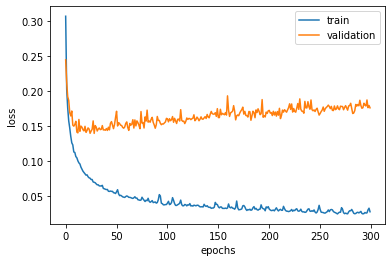

In [18]:
#繪製損失值loss的摺線圖
#在model.compile已經將損失函數設為均方誤差，所以history紀錄的loss和val_loss為mean squared error損失函數計算出來的損失值


plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

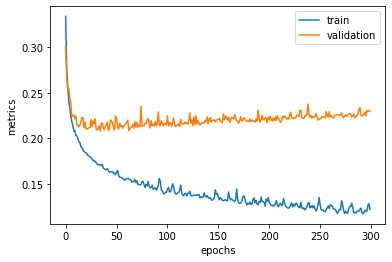

In [19]:
#繪製效能指標(metrics)的折線圖
#在model.compile已經將指標函數設為平均絕對誤差(Mean absolute error,MAE)，所以網路會去計算預測值與答案之間的Mean absolute error並記錄在history中(mean_absolute_error和val_mean_absolute_error)

plt.plot(history.history['mean_absolute_error'],label='train')
plt.plot(history.history['val_mean_absolute_error'],label='validation')
plt.ylabel('metrics')
plt.xlabel('epochs')
plt.legend(loc='upper right')

In [20]:
#測試資料的誤差百分比
#用測試資料預測房屋價格，並與答案計算誤差百分比

model.load_weights('lab2-logs/models/Best-model-1.h5') #載入模型
y_test = np.array(test_data['price']) #y_test 房屋價格取出
test_data = (test_data - mean) / std #標準化資料
x_test = np.array(test_data.drop('price',axis='columns')) #將資料存成numpy格式

y_pred = model.predict(x_test) #預測測試資料
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape) #將預測結果轉回來(因為訓練時的訓練目標也有經過標準化)

percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100 #計算平均的誤差百分比
print('model_1 percentage Error:{:.2f}'.format(percentage_error)) #顯示誤差百分比

136/136 [==============================] - 0s 1ms/step
model_1 percentage Error:13.95


# 接續上面範例，接下來測試
1.減少模型大小  
2.加入權重正規化  
3.加入dropout
三種方法的訓練成果 


In [21]:
model_2 = keras.Sequential(name='model-2')
#第一層神經元減少為16個
model_2.add(layers.Dense(16,activation='relu',input_shape=(21,)))

#第二層神經元減少為16個
model_2.add(layers.Dense(16,activation='relu'))

#最後一層設為一個unit
model_2.add(layers.Dense(1))

#顯示網路模型架構
model_2.summary()

Model: "model-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                352       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [22]:
#設定訓練用的優化器、損失函數和指標函數

model_2.compile(keras.optimizers.Adam(0.001),
              loss = keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()]
)

In [23]:
#設定回調函數

#TensorBoard回調函數會幫忙紀錄訓練資訊，並存成TensorBoard的紀錄檔

log_dir = os.path.join('lab2-logs','model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

#ModelCheckpoint回調函數幫忙儲存網路模型，可以只設定儲存最好的模型，monitor表示被監測的資料，mode min則代表監測資料越小越好

model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5',
                                             monitor = 'val_mean_absolute_error',
                                             save_best_only = True,
                                             mode ='min')

In [24]:
model_2.fit(x_train,y_train, #傳入訓練資料
            batch_size = 64, #批次大小設為64
            epochs = 300, #整個資料訓練300遍
            validation_data = (x_val, y_val), #驗證資料    
            callbacks=[model_cbk, model_mckp])   #Tensorboard回調函數紀錄訓練過程 ModelCheckpoint回調函數儲存最好的模型            


Epoch 1/300
203/203 [==============================] - 1s 3ms/step - loss: 0.5262 - mean_absolute_error: 0.4649 - val_loss: 0.3608 - val_mean_absolute_error: 0.3634
Epoch 2/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2937 - mean_absolute_error: 0.3321 - val_loss: 0.2835 - val_mean_absolute_error: 0.3195
Epoch 3/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2477 - mean_absolute_error: 0.3082 - val_loss: 0.2571 - val_mean_absolute_error: 0.3028
Epoch 4/300
203/203 [==============================] - 0s 2ms/step - loss: 0.2252 - mean_absolute_error: 0.2944 - val_loss: 0.2411 - val_mean_absolute_error: 0.2956
Epoch 5/300
203/203 [==============================] - 0s 2ms/step - loss: 0.2106 - mean_absolute_error: 0.2856 - val_loss: 0.2364 - val_mean_absolute_error: 0.2962
Epoch 6/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2011 - mean_absolute_error: 0.2786 - val_loss: 0.2259 - val_mean_absolute_error: 0.2857
Epoch 7/30

In [25]:
#加入權重正規化 此模型使用L2 regularization方法，在每一個隱藏層都加上L2 regularization，並使用 入= 0.001的正規化強度

model_3 = keras.Sequential(name='model-3')
model_3.add(layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.001),
                         activation='relu',input_shape=(21,)))
model_3.add(layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.001),
                         activation='relu'))
model_3.add(layers.Dense(1))

#顯示網路模型架構
model_3.summary()

Model: "model-3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1408      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [26]:
#設定訓練用的優化器、損失函數和指標函數

model_3.compile(keras.optimizers.Adam(0.001),
              loss = keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()]
)

In [27]:
#設定回調函數

#TensorBoard回調函數會幫忙紀錄訓練資訊，並存成TensorBoard的紀錄檔

log_dir = os.path.join('lab2-logs','model-3')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

#ModelCheckpoint回調函數幫忙儲存網路模型，可以只設定儲存最好的模型，monitor表示被監測的資料，mode min則代表監測資料越小越好

model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-3.h5',
                                             monitor = 'val_mean_absolute_error',
                                             save_best_only = True,
                                             mode ='min')

model_3.fit(x_train,y_train, #傳入訓練資料
            batch_size = 64, #批次大小設為64
            epochs = 300, #整個資料訓練300遍
            validation_data = (x_val, y_val), #驗證資料    
            callbacks=[model_cbk, model_mckp])   #Tensorboard回調函數紀錄訓練過程 ModelCheckpoint回調函數儲存最好的模型     

Epoch 1/300
203/203 [==============================] - 1s 4ms/step - loss: 0.4000 - mean_absolute_error: 0.3314 - val_loss: 0.3333 - val_mean_absolute_error: 0.2893
Epoch 2/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2745 - mean_absolute_error: 0.2719 - val_loss: 0.2877 - val_mean_absolute_error: 0.2711
Epoch 3/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2439 - mean_absolute_error: 0.2528 - val_loss: 0.2732 - val_mean_absolute_error: 0.2714
Epoch 4/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2217 - mean_absolute_error: 0.2385 - val_loss: 0.2503 - val_mean_absolute_error: 0.2402
Epoch 5/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2060 - mean_absolute_error: 0.2265 - val_loss: 0.2393 - val_mean_absolute_error: 0.2382
Epoch 6/300
203/203 [==============================] - 1s 3ms/step - loss: 0.1944 - mean_absolute_error: 0.2205 - val_loss: 0.2217 - val_mean_absolute_error: 0.2223
Epoch 7/30

In [28]:
#加入dropout(捨棄比率設定為30%)

model_4 = keras.Sequential(name='model-4')
model_4.add(layers.Dense(64,activation='relu',input_shape=(21,)))

#加入dropout
model_4.add(layers.Dropout(0.3))
model_4.add(layers.Dense(64,activation='relu'))
model_4.add(layers.Dropout(0.3))
model_4.add(layers.Dense(1))

#顯示網路模型架構
model_3.summary()

#設定訓練用的優化器、損失函數和指標函數

model_4.compile(keras.optimizers.Adam(0.001),
              loss = keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()])

#設定回調函數

#TensorBoard回調函數會幫忙紀錄訓練資訊，並存成TensorBoard的紀錄檔

log_dir = os.path.join('lab2-logs','model-4')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

#ModelCheckpoint回調函數幫忙儲存網路模型，可以只設定儲存最好的模型，monitor表示被監測的資料，mode min則代表監測資料越小越好

model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-4.h5',
                                             monitor = 'val_mean_absolute_error',
                                             save_best_only = True,
                                             mode ='min')

Model: "model-3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1408      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_4.fit(x_train,y_train, #傳入訓練資料
            batch_size = 64, #批次大小設為64
            epochs = 300, #整個資料訓練300遍
            validation_data = (x_val, y_val), #驗證資料    
            callbacks=[model_cbk, model_mckp])   #Tensorboard回調函數紀錄訓練過程 ModelCheckpoint回調函數儲存最好的模型    

Epoch 1/300
203/203 [==============================] - 1s 4ms/step - loss: 0.5582 - mean_absolute_error: 0.4650 - val_loss: 0.3052 - val_mean_absolute_error: 0.3163
Epoch 2/300
203/203 [==============================] - 1s 3ms/step - loss: 0.3316 - mean_absolute_error: 0.3598 - val_loss: 0.2640 - val_mean_absolute_error: 0.3131
Epoch 3/300
203/203 [==============================] - 1s 4ms/step - loss: 0.2887 - mean_absolute_error: 0.3340 - val_loss: 0.2451 - val_mean_absolute_error: 0.3059
Epoch 4/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2731 - mean_absolute_error: 0.3206 - val_loss: 0.2451 - val_mean_absolute_error: 0.2892
Epoch 5/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2571 - mean_absolute_error: 0.3090 - val_loss: 0.2164 - val_mean_absolute_error: 0.2867
Epoch 6/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2438 - mean_absolute_error: 0.3011 - val_loss: 0.2258 - val_mean_absolute_error: 0.2850
Epoch 7/30

# 最後，將三種模型在測試資料上驗證

In [30]:
#測試資料的誤差百分比
#用測試資料預測房屋價格，並與答案計算誤差百分比

model_2.load_weights('lab2-logs/models/Best-model-2.h5') #載入模型
y_pred = model_2.predict(x_test) #預測測試資料
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape) #將預測結果轉回來(因為訓練時的訓練目標也有經過標準化)

percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100 #計算平均的誤差百分比
print('model_2 percentage Error:{:.2f}%'.format(percentage_error)) #顯示誤差百分比

136/136 [==============================] - 0s 1ms/step
model_2 percentage Error:13.72%


In [31]:
#測試資料的誤差百分比
#用測試資料預測房屋價格，並與答案計算誤差百分比

model_3.load_weights('lab2-logs/models/Best-model-3.h5') #載入模型
y_pred = model_3.predict(x_test) #預測測試資料
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape) #將預測結果轉回來(因為訓練時的訓練目標也有經過標準化)

percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100 #計算平均的誤差百分比
print('model_3 percentage Error:{:.2f}%'.format(percentage_error)) #顯示誤差百分比

136/136 [==============================] - 0s 1ms/step
model_3 percentage Error:12.75%


In [32]:
#測試資料的誤差百分比
#用測試資料預測房屋價格，並與答案計算誤差百分比

model_4.load_weights('lab2-logs/models/Best-model-4.h5') #載入模型
y_pred = model_4.predict(x_test) #預測測試資料
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape) #將預測結果轉回來(因為訓練時的訓練目標也有經過標準化)

percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100 #計算平均的誤差百分比
print('model_4 percentage Error:{:.2f}%'.format(percentage_error)) #顯示誤差百分比

136/136 [==============================] - 0s 1ms/step
model_4 percentage Error:14.59%


In [33]:
#這行指令可以幫助我們在jupyter notbook上顯示tensorboard

%load_ext tensorboard
#執行tensorboard，並指定紀錄檔資料夾為lab2-logs
#可以觀察每一代訓練的loss及metrics的折線圖變化

%tensorboard -- logdir lab2-logs

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [-